## Imports

In [17]:
import sys
import numpy as np
import pandas as pd
from os.path import abspath, join as opj
from scipy.spatial.distance import cdist

sys.path.insert(0, abspath('../helpers/'))
from participant import Participant
from experiment import Experiment

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
%matplotlib inline

## Set paths & params

In [2]:
fig_dir = '../../paper/figs/'

plt.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
cmap = 'rocket'

## Load data

In [4]:
exp = Experiment()
forces_lecture, bos_lecture = exp.load_lecture_trajs()
exp.load_question_vectors()
forces_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')
question_text = exp.load_questions()

## Lecture & question content timeseries fig

In [ ]:
gridspec_kws = {
    'wspace': 0.1, 
    'hspace': 0.3, 
    'width_ratios': (1, 1, .3, 1)
}
cbar_kws = {'pad': 0.1}

fig, axarr = plt.subplots(2, 4, gridspec_kw=gridspec_kws)
fig.set_size_inches(12, 6)
(
    (a, b, sep1, c), 
    (d, e, sep2, f)
) = axarr

# ======== Four Forces ========
# lecture topic proportions by timepoint
sns.heatmap(forces_lecture, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=a)
a.collections[0].remove()
aspect = forces_lecture.shape[1] / forces_lecture.shape[0]
a.imshow(forces_lecture, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
a.set_title('Lecture\ntopic proportions', fontsize=12)
a.set_ylabel('Timepoint (s)', fontsize=12)
a.annotate('Four Forces', xy=(-.75, .5), xycoords=a.yaxis.label, 
           size='x-large', rotation=90, ha='right', va='center')

# lecture timepoints x timepoints correlation matrix
corrmat = np.corrcoef(forces_lecture)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=b)
b.collections[0].remove()
b.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
b.set_title('Lecture\ncorrelation matrix', fontsize=12)

# question topic proportions
sns.heatmap(forces_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=c)
c.collections[0].remove()
aspect = forces_qs.shape[1] / forces_qs.shape[0]
c.imshow(ff_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
c.set_yticklabels(list(range(1, 16, 2)), rotation=0)
c.set_title('Question\ntopic proportions', fontsize=12)
c.set_ylabel('Question', fontsize=12)

# ======== Birth of Stars ========
# lecture topic proportions by timepoint
sns.heatmap(bos_lecture, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=d)
d.collections[0].remove()
aspect = bos_lecture.shape[1] / bos_lecture.shape[0]
d.imshow(bos_lecture, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
d.set_xlabel('Topic', fontsize=12)
d.set_ylabel('Timepoint (s)', fontsize=12)
d.annotate('Birth of Stars', xy=(-.75, .5), xycoords=d.yaxis.label, 
           size='x-large', rotation=90, ha='right', va='center')

# lecture timepoints x timepoints correlation matrix
corrmat = np.corrcoef(bos_lecture)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=e)
e.collections[0].remove()
e.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
e.set_xlabel('Timepoint (s)', fontsize=12)

# question topic proportions
sns.heatmap(bos_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=f)
f.collections[0].remove()
aspect = bos_qs.shape[1] / bos_qs.shape[0]
f.imshow(ff_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
f.set_yticklabels(list(range(16, 31, 2)), rotation=0)
f.set_xlabel('Topic', fontsize=12)
f.set_ylabel('Question', fontsize=12)

# separator line
xyA = (0, 1)
xyB = (0, 0)
vline = ConnectionPatch(xyA, xyB, coordsA='axes fraction', 
                        coordsB='axes fraction', axesA=sep1, axesB=sep2, 
                        linestyle='--', linewidth=1.5, color='grey')
sep2.add_artist(vline)
sep1.axis('off')
sep2.axis('off')

labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(-.1, 1.07, labels[i], horizontalalignment='center', 
            transform=ax.transAxes, fontsize=12)
    
plt.savefig(opj(fig_dir, 'content-timeseries.pdf'), dpi=1000)
plt.show()

## Lecture-question similarity timeseries fig

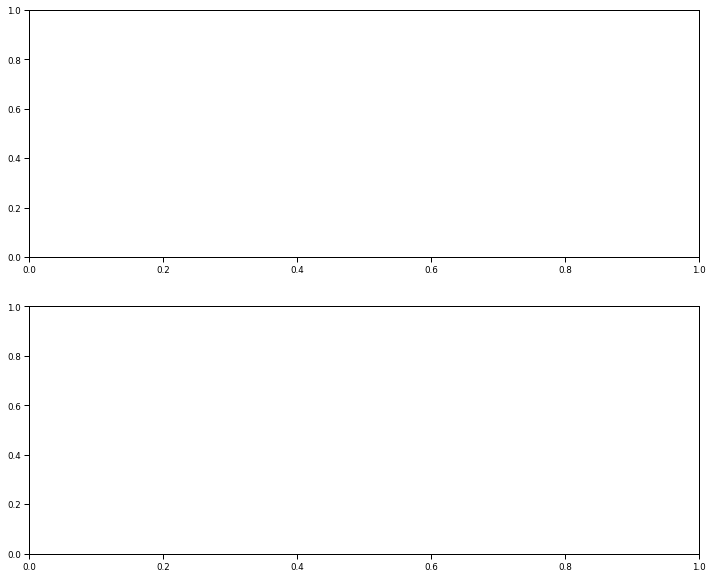

In [83]:
forces_qcorrs = 1 - cdist(forces_lecture, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(bos_lecture, bos_qs, 'correlation')

fig, axarr = plt.subplots(2, 1)
fig.set_size_inches(12, 10)
fax, bax = axarr

fax.plot(forces_qcorrs)
fax.set_title('Lecture-question content similarity', fontsize=12)
fax.set_xlim(0, ff_lec.shape[0])
fax.set_ylim(-.2, 1.05)
fax.set_ylabel('Topic vector correlation', fontsize=12)
fax.legend(labels=[f'Q {i}' for i in range(1, 16)], ncol=2, bbox_to_anchor=(1,.9))
fax.grid(False)

f.plot(1 - cdist(bos_lec, bos_qs, 'correlation'))
f.set_xlim(0, bos_lec.shape[0])
f.set_ylim(-.2, 1.05)
f.set_xlabel('Lecture timepoint', fontsize=12)
f.set_ylabel('Topic vector correlation', fontsize=12)
f.legend(labels=[f'Q {i}' for i in range(16, 31)], ncol=2, bbox_to_anchor=(1, .9))
f.grid(False)

labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(0, 1.02, labels[i], horizontalalignment='center', 
            transform=ax.transAxes, fontsize=12)

# plt.tight_layout()
# plt.savefig(opj(fig_dir, 'lecture-question-similarity.pdf'), dpi=1000)
plt.show()

In [85]:
axarr.shape

(2,)